<a href="https://colab.research.google.com/github/josegerman/machine-learning/blob/main/PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Project using PyCaret ML library**<br>
By: Jose German

# Install requirements

In [2]:
# install pycaret
#pip install pycaret

# install pycaret plus all dependencies
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s e

In [1]:
# Install MLFlow
# This library manages the ML project; It also used to track parameters, metrics, hyperparameters, feature parameters, code versions, etc
!pip install mlflow

# Imports

In [6]:
# check installed version; should be 3.0 or newer
import pycaret
pycaret.__version__

'3.2.0'

In [4]:
import pandas as pd

# Loading dataset

In [5]:
housedata = pd.read_csv('/content/new_train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_BrkFace,Exterior_VinylSd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing
0,1,2-STORY 1946+,RL,65.0,8450,NaN,0,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1-STORY 1946+,RL,80.0,9600,NaN,0,Lvl,FR2,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2-STORY 1946+,RL,68.0,11250,NaN,1,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
3,4,2-STORY 1945-,RL,60.0,9550,NaN,1,Lvl,Corner,0,...,0,0,0,0,0,0,0,0,0,1
4,5,2-STORY 1946+,RL,84.0,14260,NaN,1,Lvl,FR2,0,...,0,1,0,0,0,0,0,0,0,0


# Initial setup

In [7]:
from pycaret.regression import *
reg1 = setup(housedata, target='SalePrice', session_id=123, log_experiment=True, experiment_name='houseprice1')

# Below code line is similar to above except here we don't need MLFLow to log the experiment
#reg1 = setup(housedata, target='SalePrice', session_id=123)


,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 98)"
4,Transformed data shape,"(1456, 213)"
5,Transformed train set shape,"(1019, 213)"
6,Transformed test set shape,"(437, 213)"
7,Ordinal features,1
8,Numeric features,79
9,Categorical features,18


# Compare model baselines
Compare models function trains and evaluates the performance of al the estimators available in the model library using cross validation. The output is a scoring grid with average cross validated scored.

In [9]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15945.6097,572501405.8010,23691.7101,0.9070,0.1288,0.0946,1.1060
lightgbm,Light Gradient Boosting Machine,15988.9805,584902671.4449,23923.6088,0.9052,0.1325,0.0947,0.7100
br,Bayesian Ridge,17278.5329,612508039.2940,24590.3782,0.8993,0.1672,0.1066,0.4280
llar,Lasso Least Angle Regression,17641.8941,643493725.3204,25127.7840,0.8950,0.1647,0.1076,0.6540
ridge,Ridge Regression,17890.8806,649887225.9588,25397.4775,0.8918,0.1637,0.1094,0.4180
et,Extra Trees Regressor,17285.7992,722876373.3781,26497.6837,0.8839,0.1417,0.1025,1.9220
xgboost,Extreme Gradient Boosting,18018.3581,716984020.5101,26631.1280,0.8819,0.1386,0.1039,1.1580
rf,Random Forest Regressor,17577.0082,737918314.4469,26877.6747,0.8802,0.1444,0.1045,1.8320
lasso,Lasso Regression,18634.2618,729186390.9582,26868.2343,0.8786,0.1876,0.1140,0.5180
en,Elastic Net,18713.2707,775653903.5853,27572.5373,0.8735,0.1714,0.1144,0.8140


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

`compare_model` uses all estimators in model library except models with `Turbo=False`. `models()` will list all available modelss.

In [10]:
# Show best model
best_model

GradientBoostingRegressor(random_state=123)

# Analyze model
Plot model function analyzes the performance of the trained model ona test test.

In [ ]:
# Check help for available plots
#help(plot_model)

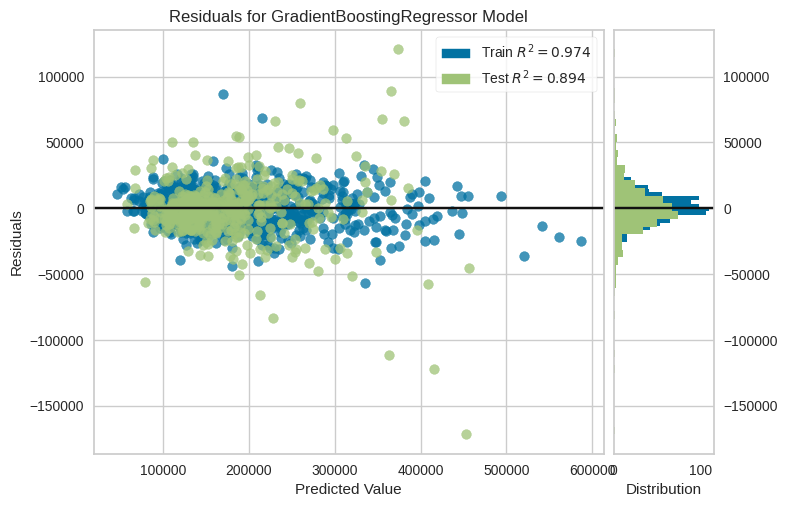

In [11]:
# Lets plot residuals
plot_model(best_model, plot='residuals')

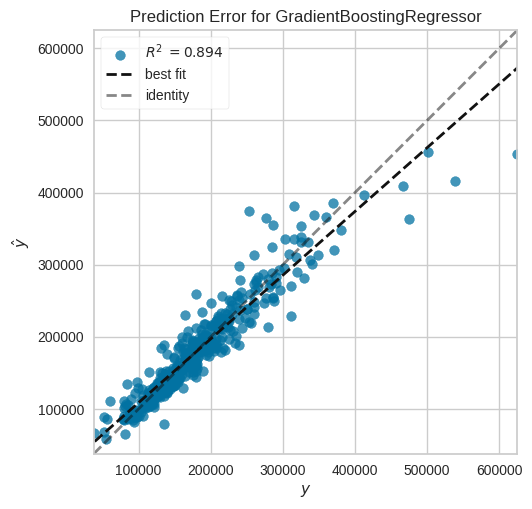

In [12]:
# Lets plot the errors
plot_model(best_model, plot='error')

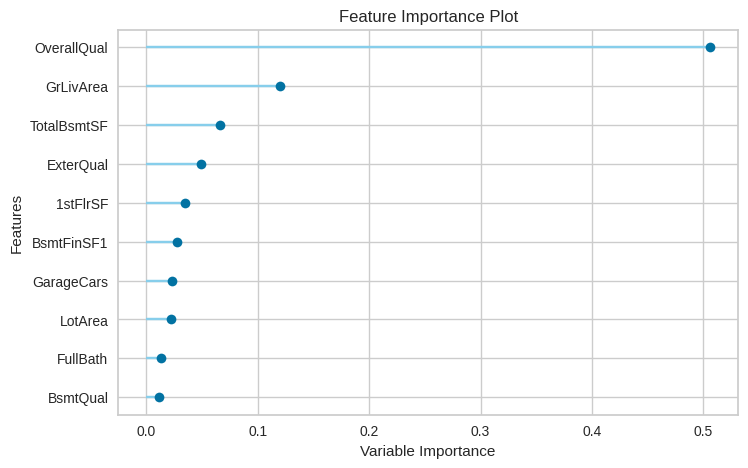

In [13]:
# Lets plot feature importance
plot_model(best_model, plot='feature')

# Create model

CatBoost Regressor used here which is the best model.

In [14]:
# Train model with default fold=10
gbr = create_model(best_model)

# Similar as above code line with specific number of folds
#lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17498.3694,650239095.9561,25499.7862,0.9124,0.1463,0.1016
1,15870.8813,534550655.3307,23120.3515,0.8952,0.1264,0.0893
2,15003.7861,582869057.8918,24142.6812,0.8926,0.1313,0.0929
3,13405.1615,300714638.2514,17341.1256,0.9309,0.1160,0.0922
4,15583.4846,499977611.3820,22360.1791,0.9173,0.1457,0.1062
5,15609.6168,546441599.0758,23376.0903,0.8872,0.1268,0.0935
6,19851.6507,1078665656.0713,32843.0458,0.8745,0.1366,0.1001
7,18495.3262,740514564.7862,27212.3973,0.9084,0.1394,0.1040
8,13305.2140,367276253.2254,19164.4529,0.9341,0.0988,0.0756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

`compare_models` allows specific models to be compared.

In [15]:
# Compare top 3 models
compare_regression_models = compare_models(include = ['lightgbm','gbr','br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15913.6430,569802994.5714,23497.9468,0.9072,0.1271,0.0936,1.1000
lightgbm,Light Gradient Boosting Machine,15840.4086,599847158.2994,24115.8241,0.9019,0.1296,0.0923,1.9820
br,Bayesian Ridge,17023.1121,602768043.5373,24251.4893,0.9005,0.1555,0.1046,0.4240


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [16]:
# Show best model from the top 3 specified in previous cell
compare_regression_models

GradientBoostingRegressor(random_state=123)

By default `compare_models` return the single best performing model (as seen in above cell) based on a defined metric.

In [17]:
# Get top 3 model based on MAE
best_mae_models_top3 = compare_models(sort = 'MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,15840.4086,599847158.2994,24115.8241,0.9019,0.1296,0.0923,3.3230
gbr,Gradient Boosting Regressor,15913.6430,569802994.5714,23497.9468,0.9072,0.1271,0.0936,1.2490
et,Extra Trees Regressor,16728.4045,686751269.1948,25597.2773,0.8902,0.1372,0.0992,2.2580
br,Bayesian Ridge,17023.1121,602768043.5373,24251.4893,0.9005,0.1555,0.1046,0.4110
xgboost,Extreme Gradient Boosting,17389.1899,675702794.4209,25797.0844,0.8874,0.1358,0.1005,0.9570
rf,Random Forest Regressor,17399.4334,724943270.4423,26530.0009,0.8819,0.1439,0.1038,2.2530
ridge,Ridge Regression,17643.4393,641884014.1194,25102.1106,0.8932,0.1598,0.1078,0.4410
lasso,Lasso Regression,18414.3339,726802556.3385,26585.1069,0.8798,0.1797,0.1126,0.5990
en,Elastic Net,18614.2696,765237601.7318,27277.5805,0.8740,0.1680,0.1133,0.5670
omp,Orthogonal Matching Pursuit,21509.2864,982635388.9790,31040.8348,0.8366,0.2248,0.1351,0.5490


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [18]:
best_mae_models_top3

[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [19]:
# Train linear regression with specific model parameters

#create_model('catboost', fit_intercept = False) #fit_intercept applies to LGBMRegressor
create_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17498.3694,650239095.9561,25499.7862,0.9124,0.1463,0.1016
1,15870.8813,534550655.3307,23120.3515,0.8952,0.1264,0.0893
2,15003.7861,582869057.8918,24142.6812,0.8926,0.1313,0.0929
3,13405.1615,300714638.2514,17341.1256,0.9309,0.1160,0.0922
4,15583.4846,499977611.3820,22360.1791,0.9173,0.1457,0.1062
5,15609.6168,546441599.0758,23376.0903,0.8872,0.1268,0.0935
6,19851.6507,1078665656.0713,32843.0458,0.8745,0.1366,0.1001
7,18495.3262,740514564.7862,27212.3973,0.9084,0.1394,0.1040
8,13305.2140,367276253.2254,19164.4529,0.9341,0.0988,0.0756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=123)

# Tune hyperparameters

In [20]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='MAE')

# Default parameters
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19188.5211,802334483.7404,28325.5094,0.8919,0.1632,0.1137
1,16670.4781,603049093.0453,24557.0579,0.8817,0.1341,0.0956
2,16253.5036,605125670.5620,24599.3022,0.8885,0.1366,0.1001
3,15098.2791,456229148.8536,21359.5213,0.8952,0.1251,0.0969
4,16100.2798,528400666.2846,22986.9673,0.9126,0.1468,0.1079
5,15006.8385,556663396.3197,23593.7152,0.8851,0.1297,0.0919
6,19898.3755,1055401789.8293,32486.9480,0.8772,0.1408,0.1033
7,18884.8108,829539284.6239,28801.7236,0.8974,0.1518,0.1085
8,16236.2855,586286085.9541,24213.3452,0.8948,0.1126,0.0857


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
# Show tuned hyperparameters
tuned_gbr

GradientBoostingRegressor(random_state=123)

In [ ]:
#help(tune_model)

# Ensemble model
Ensemble model function enables a given estimator.

In [23]:
gbr_dt = ensemble_model(gbr, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16842.0559,681300174.7372,26101.7274,0.9082,0.1449,0.0980
1,15749.3193,514146741.9613,22674.8041,0.8992,0.1248,0.0891
2,14534.1331,542353315.2277,23288.4803,0.9000,0.1289,0.0908
3,12425.5191,255122377.9630,15972.5508,0.9414,0.1183,0.0879
4,14826.9493,426807033.3867,20659.3086,0.9294,0.1424,0.1026
5,14206.0884,500672176.7429,22375.7051,0.8967,0.1217,0.0866
6,18764.2244,961738440.2359,31011.9080,0.8881,0.1305,0.0967
7,17829.2851,706009999.7576,26570.8487,0.9127,0.1408,0.1033
8,12920.9215,369733307.2365,19228.4505,0.9337,0.0908,0.0692


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [24]:
gbr_boosted = ensemble_model(gbr, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17694.3785,764484761.8148,27649.3176,0.8970,0.1535,0.1043
1,16371.1678,526728957.0588,22950.5764,0.8967,0.1242,0.0925
2,14745.9513,553604841.0809,23528.8087,0.8980,0.1283,0.0912
3,12342.7217,272868096.8159,16518.7196,0.9373,0.1227,0.0884
4,13909.0622,397076599.1700,19926.7810,0.9343,0.1323,0.0938
5,14552.0460,468829760.7340,21652.4770,0.9032,0.1269,0.0907
6,18521.9908,986216673.9334,31404.0869,0.8852,0.1305,0.0951
7,18397.4414,724139790.6480,26909.8456,0.9105,0.1384,0.1038
8,14869.4272,440466236.7305,20987.2875,0.9210,0.1010,0.0798


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Help will show additional parameters for ensemble_model
#help(ensemble_model)

# Blend models
`blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter.

In [25]:
# Top 3 models
best_mae_models_top3

[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [26]:
# Blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17873.7322,809796382.4080,28456.9215,0.8909,0.1454,0.0992
1,15167.5903,487987735.3020,22090.4444,0.9043,0.1224,0.0869
2,14382.4983,533430322.2761,23096.1105,0.9017,0.1287,0.0893
3,12128.1267,264189896.6058,16253.9194,0.9393,0.1169,0.0861
4,14242.0058,411661959.0885,20289.4544,0.9319,0.1408,0.0993
5,14200.3242,517785288.2074,22754.8959,0.8931,0.1237,0.0870
6,19127.4936,1068630330.0013,32689.9117,0.8757,0.1350,0.0967
7,17318.5566,700580455.7094,26468.4804,0.9134,0.1365,0.0997
8,12852.7682,365877412.7135,19127.9223,0.9344,0.0901,0.0687


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [ ]:
#help(blend_models)

# Stack models
The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter.

In [27]:
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18194.8241,726562730.1519,26954.8276,0.9021,0.1646,0.1105
1,17384.0590,514975783.4019,22693.0779,0.8990,0.1453,0.1070
2,17899.4558,849166215.2964,29140.4567,0.8435,0.2752,0.1082
3,14694.7263,425144391.3534,20619.0298,0.9023,0.1286,0.0977
4,14296.4040,432221774.5261,20789.9441,0.9285,0.1481,0.0989
5,15825.5221,515987643.8950,22715.3614,0.8935,0.1383,0.0974
6,21561.1233,1368402721.2890,36991.9278,0.8408,0.2080,0.1196
7,17178.2200,612591999.9765,24750.5960,0.9242,0.1245,0.0953
8,15135.0850,512993164.1995,22649.3524,0.9080,0.2082,0.0938


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [ ]:
#help(stack_models)

# Analyze and plot model

In [ ]:
# Additional analyzis to different models

# Interpret model

In [45]:
pip install shap

In [28]:
interpret_model(gbr)

TypeError: This function only supports tree based models for binary classification: lightgbm, dt, xgboost, et, rf.

In [29]:
interpret_model(gbr, plot='correlation')

TypeError: This function only supports tree based models for binary classification: lightgbm, dt, xgboost, et, rf.

In [30]:
interpret_model(gbr, plot='reason', observation=12)

TypeError: This function only supports tree based models for binary classification: lightgbm, dt, xgboost, et, rf.

# AutoML
Function returns the best model out of all trained models in the current setup based on the optimize parameter.

In [31]:
automl()

# As in our above code the best model was also chosen the best model by AutoML()

BaggingRegressor(estimator=GradientBoostingRegressor(random_state=123),
                 n_estimators=50, random_state=123)

# Dashboard
Dashboard function generates the interactive dashboard for a trained model.

In [32]:
dashboard(gbr, display_format='inline')

ImportError: cannot import name 'url_quote' from 'werkzeug.urls' (/usr/local/lib/python3.10/dist-packages/werkzeug/urls.py)

# Predict model
Predict model function allows us to review the actual 'SalePrice' with the 'prediction_label'. Actual prices are very close to predicted.

In [33]:
pred_holdouts = predict_model(gbr)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15300.6027,567922884.8850,23831.1327,0.8940,0.1227,0.0882


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing,SalePrice,prediction_label
666,668,1-STORY 1946+,RL,65.0,8125,NaN,0,Lvl,Inside,0,...,1,0,0,0,0,0,0,0,193500,200484.339935
633,635,DUPLEX,RL,64.0,6979,NaN,0,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,144000,137146.815211
161,162,2-STORY 1946+,RL,110.0,13688,NaN,1,Lvl,Inside,0,...,0,0,0,0,0,0,0,0,412500,396132.322482
147,148,2-STORY 1946+,RL,NaN,9505,NaN,1,Lvl,CulDSac,0,...,0,0,0,0,0,0,0,0,222500,225176.386453
18,19,1-STORY 1946+,RL,66.0,13695,NaN,0,Lvl,Inside,0,...,0,0,0,0,0,0,0,0,159000,153540.166077


# Create app
Create a basic gradio app for inference

In [34]:
create_app(gbr)

ModuleNotFoundError: 
'gradio' is a soft dependency and not included in the pycaret installation. Please run: `pip install gradio` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`

# Create API
Function takes an input model and creates a POST API for inference.

In [35]:
# Create API
create_api(gbr, api_name = 'housing_price_api')

ModuleNotFoundError: 
'fastapi' is a soft dependency and not included in the pycaret installation. Please run: `pip install fastapi` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`